**Titanic: Machine Learning from Disaster** adalah sebuah kompetisi di **[Kaggle](https://www.kaggle.com/c/titanic)** yang biasanya diikuti setelah menyelesaikan khursus Machine Learning di website tersebut, tetapi kompetisi ini juga terbuka bagi siapa pun yang ingin berkontribusi.

## The Challenge
**Goal** : Dengan menggunakan data penumpang Titanic (name, age, price of ticket, etc) mencoba untuk memprediksi siapa yang akan selamat dan yang akan tidak selamat pada data test.csv. Dalam file test.csv tidak di sertakan kolom **Survived**, itu adalah tugas kita untuk memprediksinya.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('titanic/train.csv')
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [3]:
test_data = pd.read_csv('titanic/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
submission = pd.read_csv('titanic/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

In [6]:
df_all = concat_df(train_data, test_data)

In [7]:
train_data.name = 'Training Set'
test_data.name = 'Test Set'
df_all.name = 'All Set'

df_all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


**Penjelasan dari dataset**
- PassengerId adalah id pada row, maka tidak ada pengaruh terhadap target yang dicari
- Survived adalah target yang akan diprediksi, nilai 0 = Not Survived dan nilai 1 = Survived
- Pclass (Passenger Class) adalah kategori level sosial ekonomi penumpang dengan nilai (1, 2 atau 3):
    - 1 = Upper Class
    - 2 = Middle Class
    - 3 = Lower Class
- Name, Sex dan Age merupakan data self-explanatory
- SibSp adalah jumlah saudara dari penumpang
- Parch adalah jumlah Orang Tua dan anak dari penumpang
- Ticket adalah jumlah tiket penumpang
- Fare adalah tarif yang di kenakan kepada penumpang
- Cabin adalah nomor kabin penumpang
- Embarked adalah pelabuhan pemberangkatan ada 3 pelabuhan (C, Q atau S):
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton

In [8]:
submission_data = pd.read_csv('titanic/gender_submission.csv')
submission_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Data submission adalah contoh data hasil prediksi yang akan diupload ke **Kaggle**

### Exploring Dataset

#### Shape Data
Untuk mengetahui bentuk dari dataframe kita, berapa banyak row dan column yang ada di dalamnya

In [9]:
print(f'Training X Shape = {train_data.shape}')
print(f'Training y Shape = {train_data.Survived.shape}')
print(f'Test X Shape = {test_data.shape}')
print('\n')
print(train_data.columns)
print(test_data.columns)

Training X Shape = (891, 12)
Training y Shape = (891,)
Test X Shape = (418, 11)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


#### Summary Statistic

In [10]:
df_all.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


#### Mengetahui Deskripsi Singkat dan Missing Values
##### Deskripsi Singkat dari Dataset

In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     891 non-null    float64
 11  Ticket       1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


Kita dapat melihat bahwa ada beberapa data yang kosong di kolom 'Embarked, 'Age', dan 'Cabin'

##### Missing Values
Kita akan melihat jumlah data yang kosong tersebut

In [12]:
print('TRAIN DATA \n',train_data.isnull().sum(),'\n')
print('TEST DATA \n',test_data.isnull().sum())

TRAIN DATA 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

TEST DATA 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [13]:
df_all.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

## Data Preprocessing
### Mengetahui Korelasi Fitur

In [14]:
df_all_cor = df_all.corr().abs()
df_all_cor

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.178740,0.150917,0.028814,0.408106,0.243699,0.077221
Fare,0.178740,1.000000,0.221539,0.031428,0.558629,0.160238,0.257307
Parch,0.150917,0.221539,1.000000,0.008942,0.018322,0.373587,0.081629
PassengerId,0.028814,0.031428,0.008942,1.000000,0.038354,0.055224,0.005007
Pclass,0.408106,0.558629,0.018322,0.038354,1.000000,0.060832,0.338481
SibSp,0.243699,0.160238,0.373587,0.055224,0.060832,1.000000,0.035322
Survived,0.077221,0.257307,0.081629,0.005007,0.338481,0.035322,1.000000


#### Membaca Hasil Korelasi Fitur
Korelasi dengan mendekati nilai 1 untuk korelasi positive dan nilai -1 untuk korelasi terbalik.

- Pada data ini dapat dilihat bahwa target variable kita Survived sangat besar korelasinya dengan Pclass dan Fare.

- Sedangkan Age sangat berkaitan dengan Pclass, Sibling Spouse (SibSp), Parent Children (Parch).

- Dapat diasumsikan bahwa kebanyakan orang yang selamat adalah orang dengan PClass atas dan Tuanya umur seseorang dapat dikatakan dia akan membawa saudara/orang tua/anak/pasangan.

- Dan Fare (harga) berkaitan dengan Pclass (kelas penumpang) seorang penumpang.

### Menangani Missing Values

**Age** => Untuk mengisi data **Age** yang kosong, karena kita mengetahui bahwa Umur seseorang berkaitan dengan Kelas penumpang, kita dapat mengisinya dari nilai tengah umur seseorang di dalam kelas tersebut dan berdasar jenis kelamin.
Jadi saya akan mengisi berdasarkan hal tersebut

In [15]:
age_by_pclass_sex = df_all.groupby(['Sex', 'Pclass']).median()['Age']
print(age_by_pclass_sex, '\n')
for pclass in range(1,4):
    for sex in ['female', 'male']:
        print(f'Median age of pclass {pclass} {sex}s : {age_by_pclass_sex[sex][pclass]}')
        
# Filling the missing values in Age with the medians of Sex and Pclass groups
df_all['Age'] = df_all.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64 

Median age of pclass 1 females : 36.0
Median age of pclass 1 males : 42.0
Median age of pclass 2 females : 28.0
Median age of pclass 2 males : 29.5
Median age of pclass 3 females : 22.0
Median age of pclass 3 males : 25.0


**Embarked** => Untuk **Embarked**, kebanyakan orang dari Titanic berangkat dari Southampton / S.

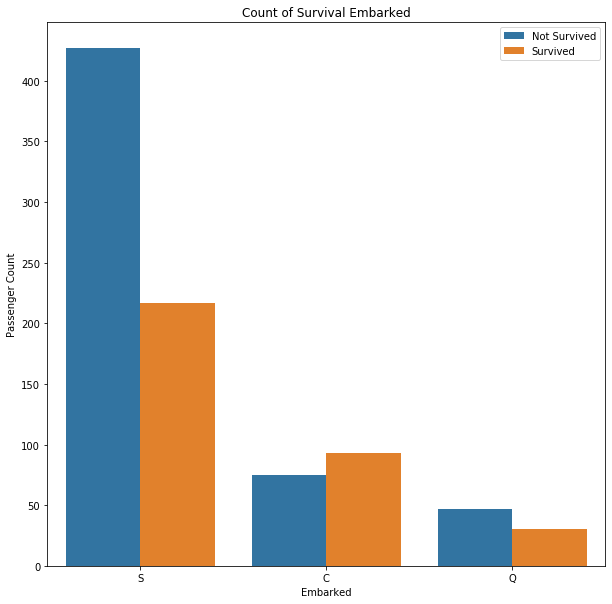

In [16]:
fig, axs = plt.subplots(ncols=1, figsize=(10,10))

sns.countplot(x='Embarked', hue='Survived', data=train_data)
plt.legend(['Not Survived', 'Survived'])
plt.title('Count of Survival Embarked')
plt.xlabel('Embarked')
plt.ylabel('Passenger Count')

plt.show()

Sehingga kita dapat mengisinya dengan S saja. Ini lebih baik daripada membiarkan datanya kosong.

In [17]:
df_all['Embarked'] = df_all['Embarked'].fillna('S')

**Fare** => Untuk **Fare**, kita tahu bahwa Fare sangat berkaitan dengan Kelas Penumpang, Jumlah Parent/Children, dan Jumlah Sibling/Spouse. Sehingga kita dapat mengisinya dengan nilai tengah dari orang yang berada di grup tersebut.

In [18]:
med_fare = df_all.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
df_all['Fare'] = df_all['Fare'].fillna(med_fare)

### Eksplorasi & Analisa Data

Ingat tujuan : kita ingin menemukan pola di dataset train_data.csv yang membantu untuk meprediksi penumpang di test_data.csv selamat dan tidak selamat.
.

#### Eksplor Pola
File sampel yang dikirim dalam gender_submission.csv mengasumsikan bahwa semua penumpang wanita selamat (dan semua penumpang pria meninggal).

Apakah ini dugaan yang masuk akal? Kita akan memeriksa apakah pola ini juga berlaku di dalam data train_data.csv.

In [19]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print(f'{rate_women} wanita yang selamat')

men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print(f'{rate_men} pria yang selamat')

0.7420382165605095 wanita yang selamat
0.18890814558058924 pria yang selamat


Hasil di atas adalah persentase penumpang wanita dan pria (didalam train_data.csv) yang selamat.

Dari sini dapat dilihat bahwa :

- hampir 75% wanita selamat, 
- dan hanya sekitar 19% pria selamat. 

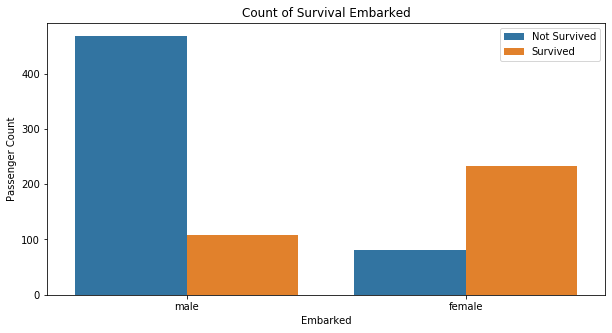

In [20]:
fig, axs = plt.subplots(ncols=1, figsize=(10,5))

sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.legend(['Not Survived', 'Survived'])
plt.title('Count of Survival Embarked')
plt.xlabel('Embarked')
plt.ylabel('Passenger Count')

plt.show()

Gender tampaknya merupakan indikator kuat untuk bertahan hidup dikapal tersebut

File gender_submission.csv mendasarkan prediksi pada hanya satu kolom. 

Dengan mempertimbangkan banyak kolom kita dapat menemukan pola yang lebih kompleks yang berpotensi menghasilkan prediksi yang lebih baik.

#### Eksplorasi & Analisa Kolom 'Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp' 

In [21]:
train_data_no_na = df_all.loc[0:890]

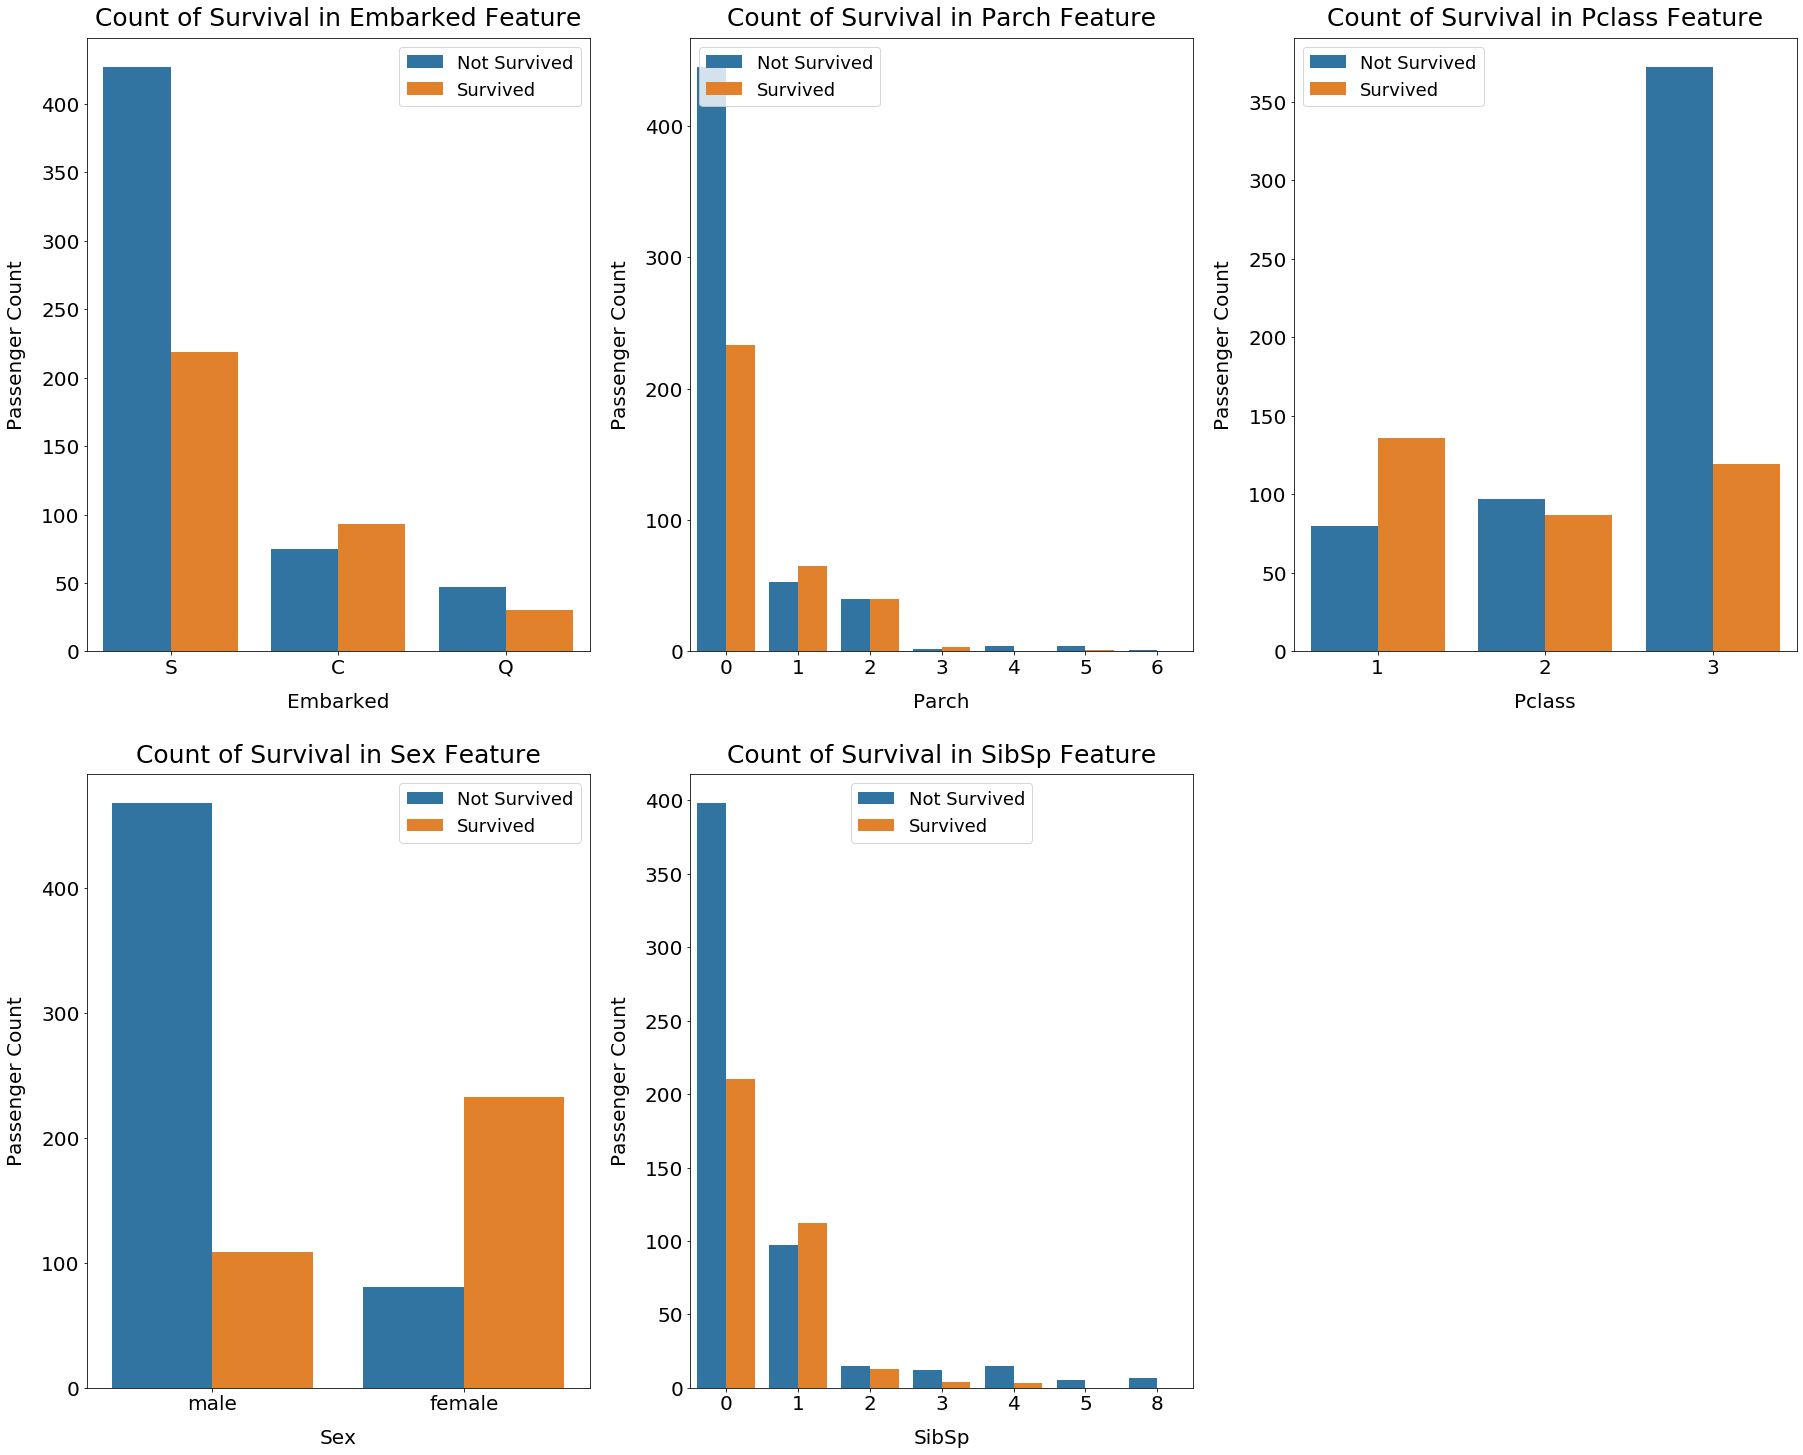

In [22]:
cat_features = ['Embarked', 'Parch', 'Pclass', 'Sex', 'SibSp']

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
plt.subplots_adjust(right=2.5, top=2)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2,3,i)
    sns.countplot(x=feature, hue='Survived', data=train_data_no_na)
    
    plt.xlabel(f'{feature}', size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)

    plt.legend(['Not Survived', 'Survived'], prop={'size':18})
    plt.title(f'Count of Survival in {feature} Feature', size=25, y=1.01)

plt.show()

**Embarked** = Dari plot yang dihasikan, penumpang yang berangkat dari Cherbourg lebih banyak yang selamat, sedangkan penumpang dari Southampton, hanya setengahnya yang selamat.

**Parch** = Untuk orang yang membawa hanya 1 Parent/Children, lebih banyak yang selamat.

**PClass** = Untuk orang dengan Kelas Penumpang 1, kemungkinan selamatnya jauh lebih tinggi. Dan penumpang dengan Kelas Penumpang 3 hanya sedikit yang selamat.

**Sex** = Dan Orang yang membawa 1 Sibling / Spouse kemungkinan selamatnya jauh lebih besar.

**SibSp** = Orang yang membawa 2 Sibling / Spouse kemungkinan selamatnya cukup kecil.

#### Eksplorasi & Analisa Kolom 'Fare' & 'Age'
Untuk Data **Fare** dan **Age**, akan dibagi ke dalam beberapa Bin / Group.

**Fare** = Dan untuk Fare termurah adalah 0 dan termahal adalah 512.

In [23]:
print(f'Fare terendah = {df_all.Fare.min()}')
print(f'Fare tertinggi = {df_all.Fare.max()}')

Fare terendah = 0.0
Fare tertinggi = 512.3292


Sehingga dapat dibagi menjadi 13 kelompok quantile mungkin cukup. 

In [24]:
train_data_no_na['Fare'] = pd.qcut(train_data_no_na['Fare'], 13)

C:\Users\Deny Frans\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
train_data_no_na.loc[:, ['Fare']]

,Fare
0,"(7.229, 7.75]"
1,"(55.9, 83.158]"
2,"(7.896, 8.05]"
3,"(33.308, 55.9]"
4,"(7.896, 8.05]"
...,...
886,"(10.5, 13.0]"
887,"(26.55, 33.308]"
888,"(15.85, 24.0]"
889,"(26.55, 33.308]"


Berikut visualisasi kolom Fare

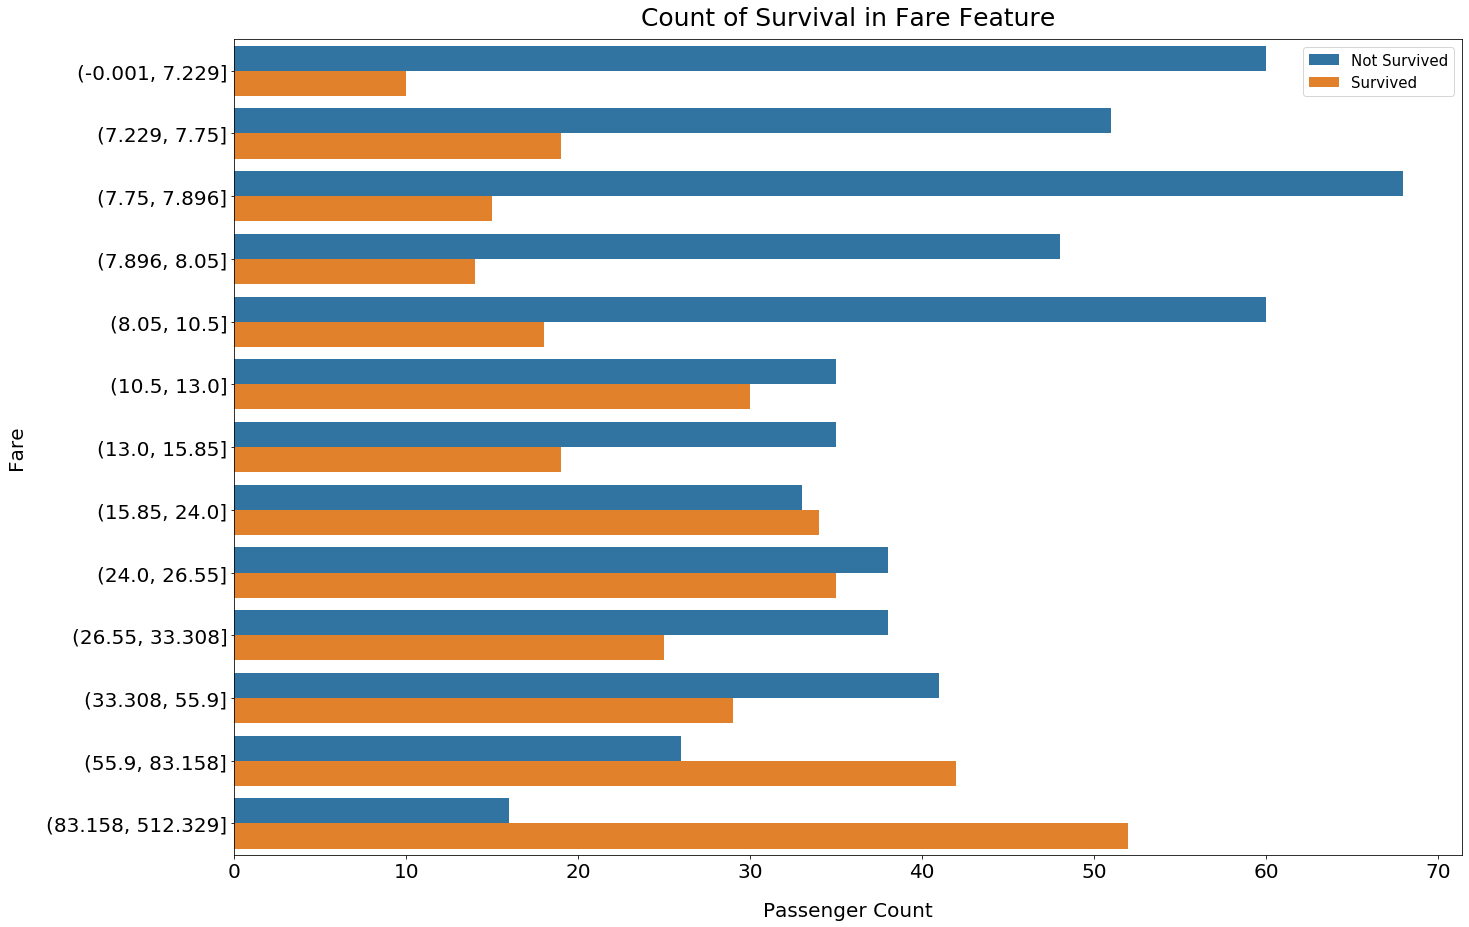

In [26]:
fig, axis = plt.subplots(figsize=(22,15))
sns.countplot(y='Fare', hue='Survived', data=train_data_no_na)

plt.xlabel('Passenger Count', size=20, labelpad=20)
plt.ylabel('Fare', size=20, labelpad=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=25, y=1.01)

plt.show()

Dapat dilihat bahwa semakin mahal harga tiketnya, semakin besar kemungkinan orang itu selamat, dimulai dari harga 56 ke atas.

Tetapi banyak orang yang selamat dimulai dari 10.5 sudah cukup meningkat, kecuali kejadian yang terjadi pada kelompok pemegang tiket berharga 13-15.85.

**Age** = Dari fungsi describe sebelumnya, kita dapat melihat usia termuda adalah 0.17 tahun dan yang tertua adalah 80 tahun. Kode dibawah akan menunjukkan nilai terendah dan tertinggi dari kolom **Age**.

Sehingga membaginya dengan 10 kelompok quantile mungkin cukup.

In [27]:
df_all['Age'] = pd.qcut(df_all['Age'], 10)

In [28]:
df_all.Age.min()

Interval(0.169, 16.0, closed='right')

In [29]:
train_data_no_na = df_all.loc[:890]

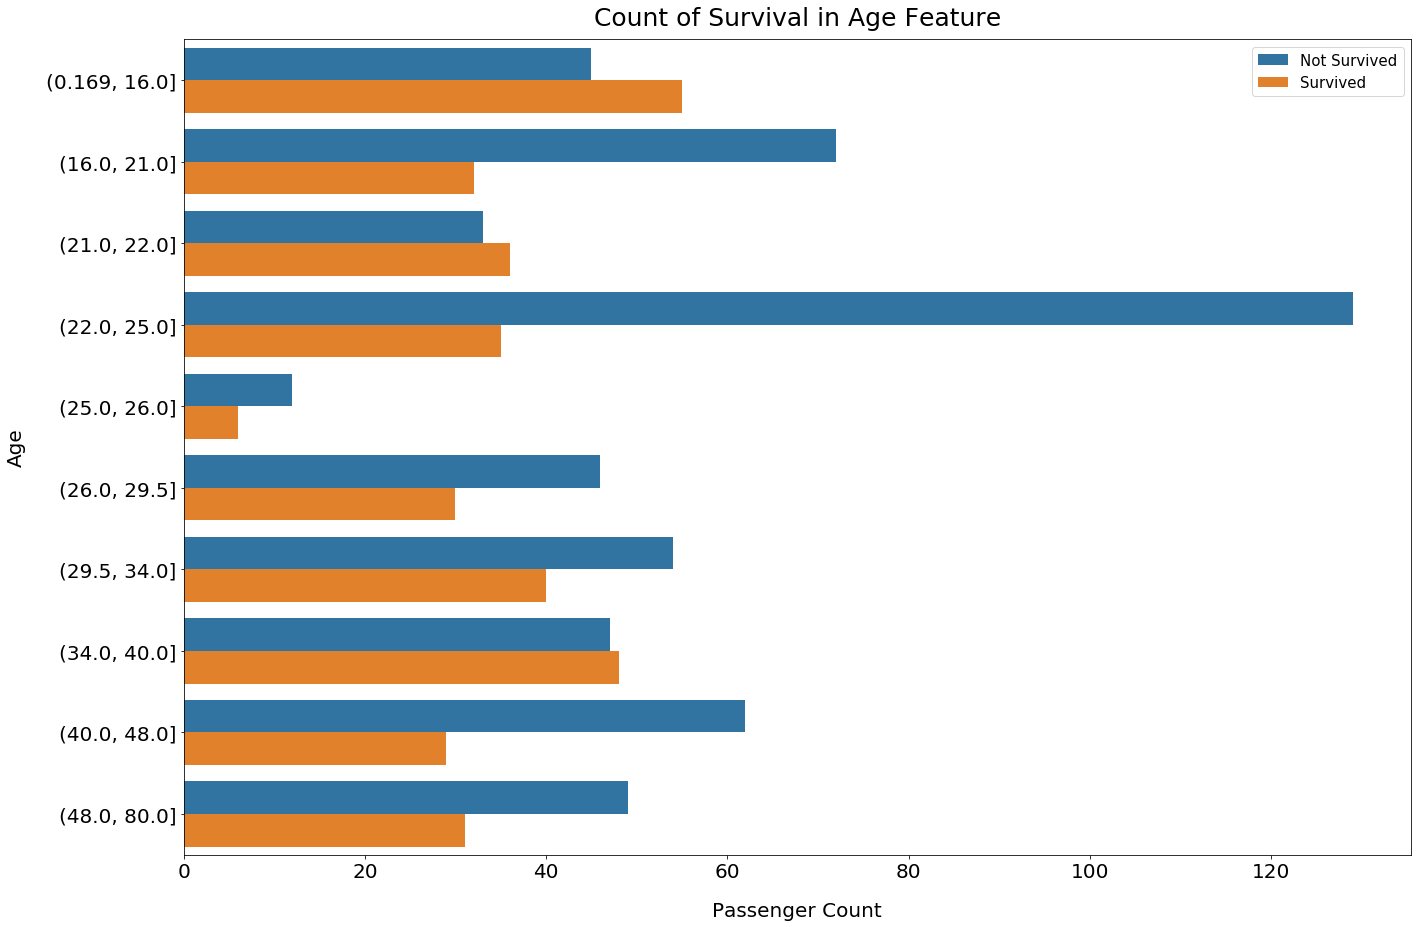

In [30]:
fig, axis = plt.subplots(figsize=(22,15))
sns.countplot(y='Age', hue='Survived', data=train_data_no_na)

plt.xlabel('Passenger Count', size=20, labelpad=20)
plt.ylabel('Age', size=20, labelpad=20)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Age'), size=25, y=1.01)

plt.show()

Plot menggambarkan group usia terhadap tingkat keselamatan.
Dapat kita lihat, rentang umur 0 sampai 14 tahun memiliki tingkat keselamatan paling tinggi dan rentang umur 31-36 di urutan kedua.

Tingkat kematian paling tinggi ada di rentang umur 22 - 25

## FEATURE ENGINEERING
### Feature Engineering - Part 1
Fitur pertama yang akan dibuat adalah Family_Size, sesuai namanya ini adalah gabungan dari: Parent, Children, Sibling, dan Spouse. Lalu kita tambahkan 1 dengan asumsi menghitung diri orang itu juga.

Fitur kedua yang kita buat adalah menggabungkan Family_Size dengan group nya masing” tergantung jumlahnya.

Kategorinya adalah seperti berikut.

- Family Size 1 = Alone
- Family Size 2, 3 dan 4 = Small
- Family Size 5 dan 6 = Medium
- Family Size 7, 8 dan 11 = Large

    df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)
Setelah itu kita gambarkan plotnya.

In [31]:
df_all['Family_Size'] = df_all['SibSp'] + df_all['Parch'] + 1 

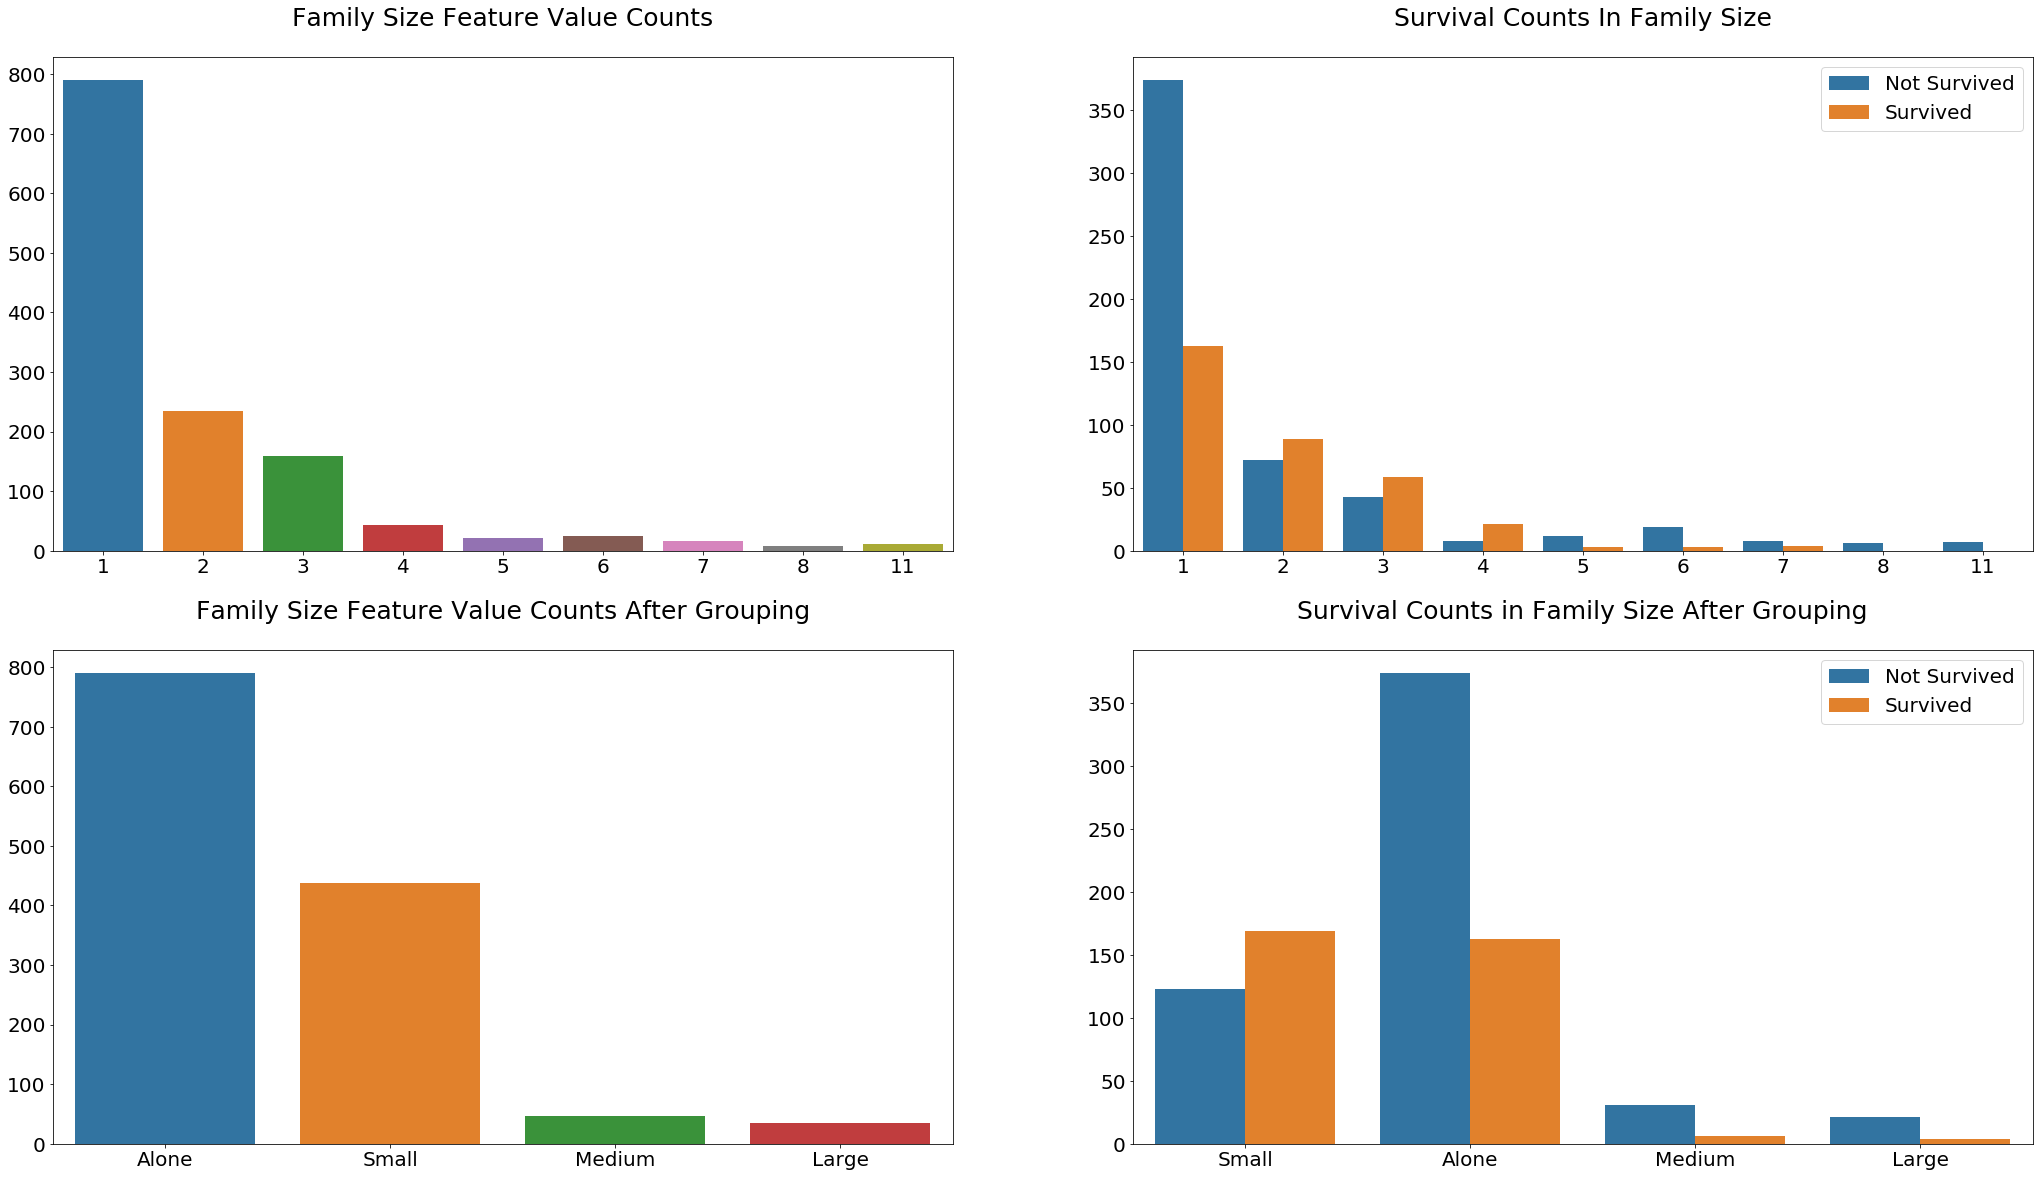

In [32]:
fig, axs = plt.subplots(figsize=(20,20), ncols=2, nrows=2)
plt.subplots_adjust(right=1.5)

sns.barplot(x=df_all['Family_Size'].value_counts().index, 
            y=df_all['Family_Size'].value_counts().values, ax=axs[0][0])
sns.countplot(x='Family_Size', hue='Survived', data=df_all, ax=axs[0][1])

axs[0][0].set_title('Family Size Feature Value Counts', size=25, y=1.05)
axs[0][1].set_title('Survival Counts In Family Size', size=25, y=1.05)

family_map = {1:'Alone', 2:'Small', 3:'Small', 4:'Small', 5:'Medium', 
              6:'Medium', 7:'Large', 8:'Large', 11:'Large'}

df_all['Family_Size_Grouped'] = df_all['Family_Size'].map(family_map)

sns.barplot(x=df_all['Family_Size_Grouped'].value_counts().index, 
            y=df_all['Family_Size_Grouped'].value_counts().values, ax=axs[1][0])
sns.countplot(x='Family_Size_Grouped', hue='Survived', data=df_all, ax=axs[1][1])

axs[1][0].set_title('Family Size Feature Value Counts After Grouping', size=25, y=1.05)
axs[1][1].set_title('Survival Counts in Family Size After Grouping', size=25, y=1.05)

for i in range(2):
    axs[i][1].legend(['Not Survived', 'Survived'], loc='upper right', prop={'size':20})
    for j in range(2):
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
        axs[i][j].set_xlabel('')
        axs[i][j].set_ylabel('')
        
plt.show()


Pada plot menjelaskan bahwa orang dengan Family_Size 2,3,4 mempunyai kemungkinan selamat lebih besar, selebihnya kemungkinannya menurun dan orang yang pergi dengan Family_Size_Grouped Small lebih terlihat mempunyai tingkat keselamatan lebih besar.

### Feature Engineering - Part 2
Feature baru bernama Ticket_Frequency dengan nilai gabungan dari Ticket yang sama.

In [33]:
df_all.loc[:,['Ticket']]

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
1304,A.5. 3236
1305,PC 17758
1306,SOTON/O.Q. 3101262
1307,359309


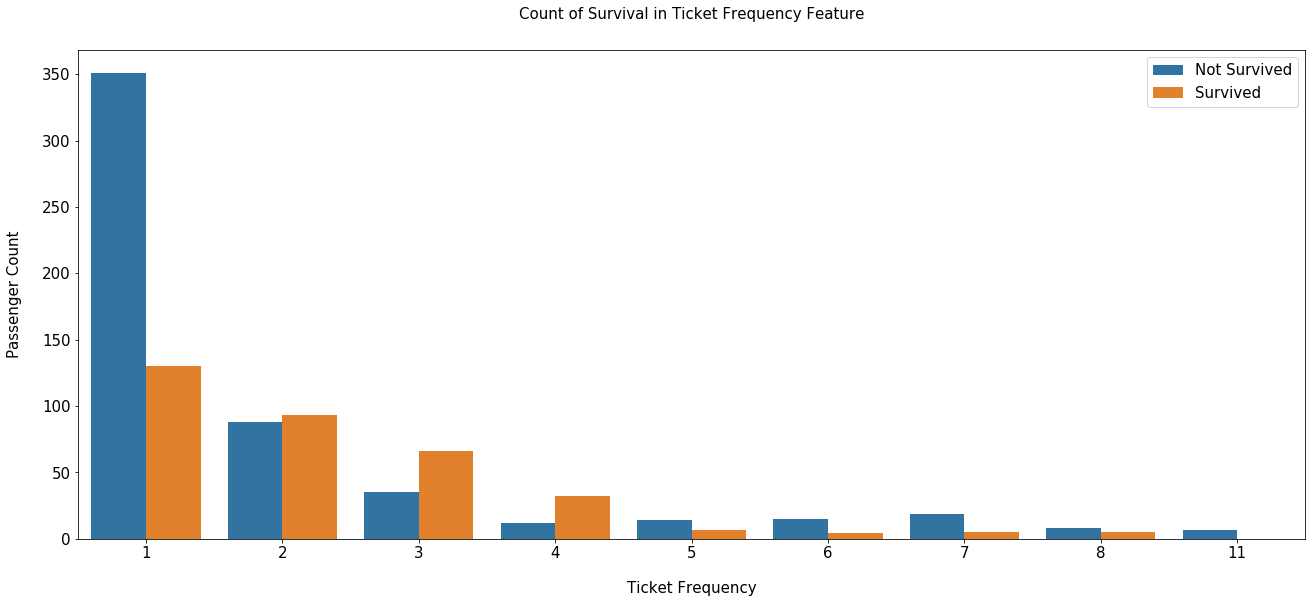

In [34]:
df_all['Ticket_Frequency'] = df_all.groupby('Ticket')['Ticket'].transform('count')

fig, axs = plt.subplots(figsize=(22,9))
sns.countplot(x='Ticket_Frequency', hue='Survived', data=df_all)

plt.xlabel('Ticket Frequency', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Ticket Frequency'), size=15, y=1.05)

plt.show()

Pada hasil plot feature Family_Size_Grouped, di angka 2,3,4 kemungkinan tingkat selamatnya meningkat.

Ada kemungkinan pembantu atau teman yang menggunakan tiket yang sama tetapi tidak terhitung sebagai keluarga sehingga feature Family_Size_Grouped ini bisa menambah akurasi model yang akan dibuat nanti.

### Feature Engineering - Part 3

Membuat fitur baru dengan nama ‘Title’ yang berisi jabatan seseorang.

In [35]:
df_all['Title'] = df_all['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
print(df_all['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


Jabatan yang paling umum di sini adalah Mr, Mrs. , dan Miss

In [36]:
df_all.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title
0,"(21.0, 22.0]",NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr
1,"(34.0, 40.0]",C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Mrs


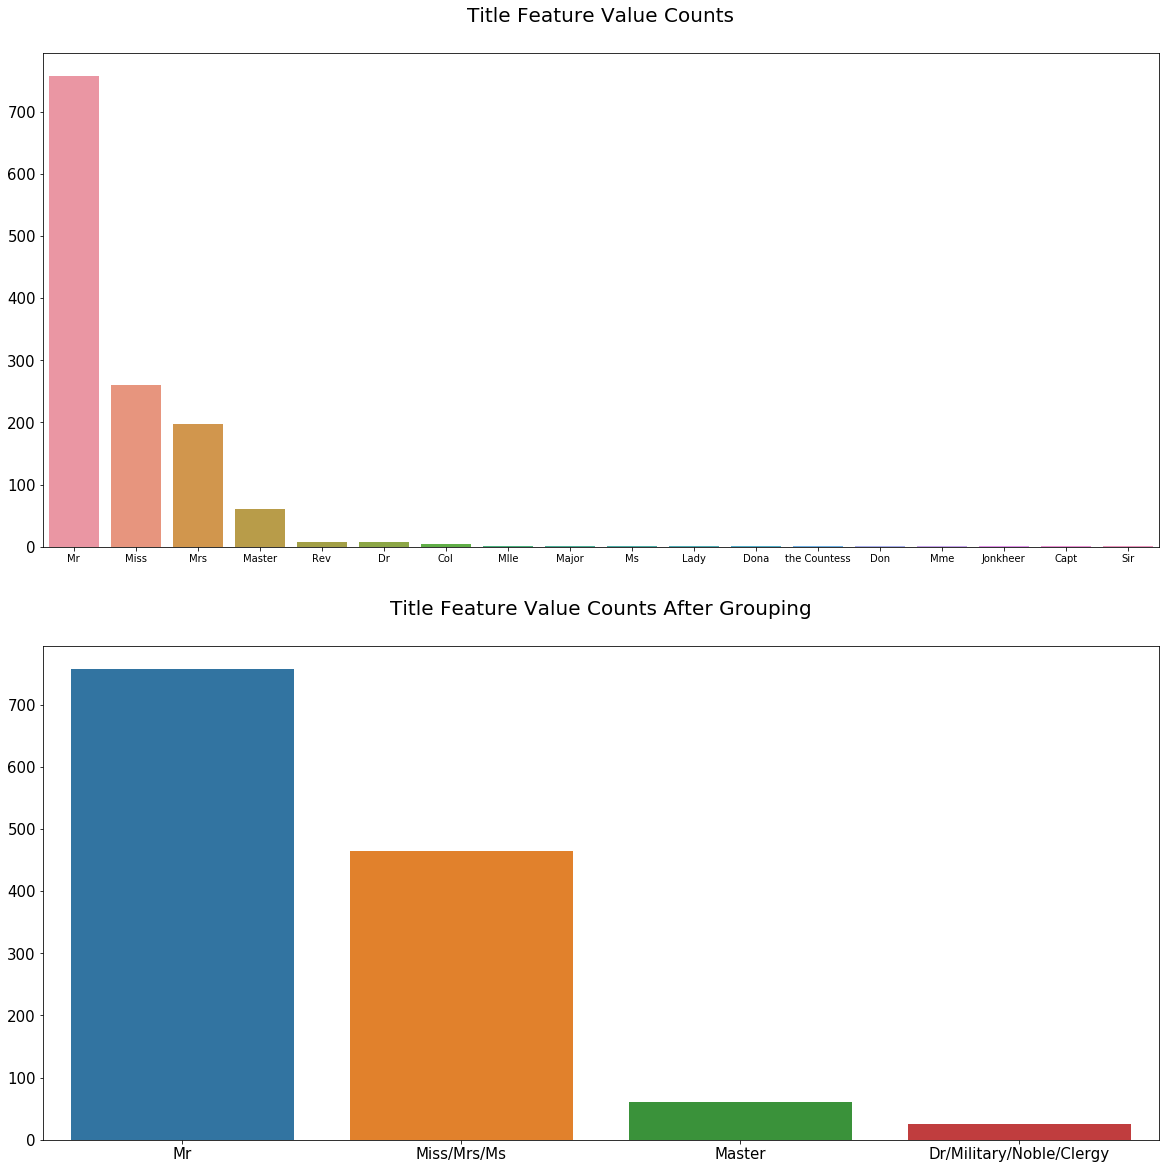

In [37]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

# Bagian ini adalah bagian mengubah ['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'] 
# akan kita ubah menjadi 'Miss/Mrs/Ms' ['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'] 
# menjadi 'Dr/Military/Noble/Clergy'
df_all['Title'] = df_all['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 
                                           'the Countess', 'Dona'], 'Miss/Mrs/Ms')
df_all['Title'] = df_all['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 
                                           'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=df_all['Title'].value_counts().index, y=df_all['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

In [38]:
df_all.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Family_Size_Grouped,Ticket_Frequency,Title
0,"(21.0, 22.0]",NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Small,1,Mr
1,"(34.0, 40.0]",C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2,Small,2,Miss/Mrs/Ms


## Two Approaches

In [39]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

#### Label Encoder

In [40]:
train_data_no_na = df_all[0:890]
test_data_no_na = df_all[891:]

In [41]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
dfs=[train_data_no_na,test_data_no_na]

non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped', 'Age', 'Fare']

for df in dfs:
    for feature in non_numeric_features:        
        df[feature] = LabelEncoder().fit_transform(df[feature])

C:\Users\Deny Frans\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### One Hot Encoder

In [42]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
encoded_features = []

for df in dfs:
    for feature in cat_features:
        encoded_feat = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        n = df[feature].nunique()
        cols = ['{}_{}'.format(feature, n) for n in range(1, n + 1)]
        encoded_df = pd.DataFrame(encoded_feat, columns=cols)
        encoded_df.index = df.index
        encoded_features.append(encoded_df)

In [43]:
df_train = pd.concat([train_data_no_na, *encoded_features[:5]], axis=1)
df_test = pd.concat([test_data_no_na, *encoded_features[5:]], axis=1)

Berikut ini adalah dataset berisi parameter yang akan digunakan untuk membuat model machine learning

In [44]:
df_all = concat_df(df_train, df_test)
drop_cols = ['Cabin', 'Embarked', 'Survived', 'Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Title','Family_Size',
            'Family_Size_Grouped']

df_all.drop(columns=drop_cols, inplace=True)
df_all.head()

,Age,Embarked_1,Embarked_2,Embarked_3,Family_Size_Grouped_1,Family_Size_Grouped_2,Family_Size_Grouped_3,Family_Size_Grouped_4,Fare,Parch,...,Pclass_2,Pclass_3,Sex_1,Sex_2,SibSp,Ticket_Frequency,Title_1,Title_2,Title_3,Title_4
0,2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,18,0,...,0.0,1.0,0.0,1.0,1,1,0.0,0.0,0.0,1.0
1,7,1.0,0.0,0.0,0.0,0.0,0.0,1.0,207,0,...,0.0,0.0,1.0,0.0,1,2,0.0,0.0,1.0,0.0
2,4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,41,0,...,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,0.0
3,7,0.0,0.0,1.0,0.0,0.0,0.0,1.0,189,0,...,0.0,0.0,1.0,0.0,1,2,0.0,0.0,1.0,0.0
4,7,0.0,0.0,1.0,1.0,0.0,0.0,0.0,43,0,...,0.0,1.0,0.0,1.0,0,1,0.0,0.0,0.0,1.0


In [45]:
df_all.columns

Index(['Age', 'Embarked_1', 'Embarked_2', 'Embarked_3',
       'Family_Size_Grouped_1', 'Family_Size_Grouped_2',
       'Family_Size_Grouped_3', 'Family_Size_Grouped_4', 'Fare', 'Parch',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_1', 'Sex_2', 'SibSp',
       'Ticket_Frequency', 'Title_1', 'Title_2', 'Title_3', 'Title_4'],
      dtype='object')

#### Standard Scaler
Melakukan normalisasi data agar data yang digunakan tidak memiliki penyimpangan yang besar.

In [46]:
df_train.shape

(890, 32)

In [47]:
X_train = StandardScaler().fit_transform(df_train.drop(columns=drop_cols))
y_train = df_train['Survived'].values
X_test = StandardScaler().fit_transform(df_test.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (418, 21)
y_train shape: (890,)
X_test shape: (418, 21)


## Machine Learning Model

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

#### 1. Decision Tree Classifier

In [49]:
decision_tree = DecisionTreeClassifier(criterion='gini',
                                               max_depth=5,
                                               min_samples_split=4,
                                               min_samples_leaf=5,
                                               max_features='auto',
                                               random_state=50)
decision_tree.fit(X_train, y_train)

decision_tree_pred = decision_tree.predict(X_test)

scores_dt = cross_val_score(decision_tree, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores_dt)
print("Mean:", scores_dt.mean())
print("Standard Deviation:", scores_dt.std())

Scores: [0.78651685 0.80898876 0.76404494 0.80898876 0.83146067 0.79775281
 0.79775281 0.78651685 0.86516854 0.84269663]
Mean: 0.8089887640449437
Standard Deviation: 0.0284249677318506


#### 2. KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn_pred = knn.predict(X_test)

scores_knn = cross_val_score(knn, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores_knn)
print("Mean:", scores_knn.mean())
print("Standard Deviation:", scores_knn.std())

Scores: [0.7752809  0.82022472 0.74157303 0.84269663 0.82022472 0.88764045
 0.80898876 0.76404494 0.82022472 0.84269663]
Mean: 0.8123595505617978
Standard Deviation: 0.04052739055476724


#### 3. RandomForestClassifier
Model ini dibangun dari beberapa "tree" yang secara individual akan mempertimbangkan data setiap penumpang dan memilih apakah individu tersebut selamat. Kemudian, model ini membuat keputusan demokratis: hasil dengan suara terbanyak menang!
##### Menemukan Jumlah Pohon (n_estimators) Terbaik

In [51]:
def get_mae(max_leaf_nodes, X_train,y_train):
    my_model = RandomForestClassifier(max_leaf_nodes=max_leaf_nodes, random_state=0)
    my_model.fit(X_train,y_train)
    preds = my_model.predict(X_train)
    mae = mean_absolute_error(y_train, preds)
    return (mae)

for max_leaf_nodes in [5,50,100, 500,1000,1100]:
    my_mae = get_mae(max_leaf_nodes, X_train, y_train)
    print(f'Max leaf nodes {max_leaf_nodes} \t\t Mean Absolute Error {my_mae}')

Max leaf nodes 5 		 Mean Absolute Error 0.17640449438202246
Max leaf nodes 50 		 Mean Absolute Error 0.10561797752808989
Max leaf nodes 100 		 Mean Absolute Error 0.06853932584269663
Max leaf nodes 500 		 Mean Absolute Error 0.038202247191011236
Max leaf nodes 1000 		 Mean Absolute Error 0.038202247191011236
Max leaf nodes 1100 		 Mean Absolute Error 0.038202247191011236


##### Prediksi menggunakan Random Forest Classifier

In [52]:
rf_model = RandomForestClassifier(criterion='gini', 
                                               n_estimators=500,
                                               max_depth=5,
                                               min_samples_split=4,
                                               min_samples_leaf=5,
                                               max_features='auto',
                                               oob_score=True,
                                               random_state=50)

rf_model.fit(X_train,y_train)

rf_pred = rf_model.predict(X_test)

scores_rf = cross_val_score(rf_model, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores_rf)
print("Mean:", scores_rf.mean())
print("Standard Deviation:", scores_rf.std())

Scores: [0.84269663 0.86516854 0.7752809  0.86516854 0.84269663 0.80898876
 0.83146067 0.78651685 0.85393258 0.85393258]
Mean: 0.8325842696629213
Standard Deviation: 0.030337078651685386


#### 4. XGBClassifier

In [53]:
xgb_model = XGBClassifier(n_estimators = 1000, learning_rate = 0.05)
xgb_model.fit(X_train,y_train)

xgb_pred = xgb_model.predict(X_test)

scores_xgb = cross_val_score(xgb_model, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores_xgb)
print("Mean:", scores_xgb.mean())
print("Standard Deviation:", scores_xgb.std())

Scores: [0.78651685 0.82022472 0.70786517 0.85393258 0.85393258 0.84269663
 0.85393258 0.76404494 0.82022472 0.86516854]
Mean: 0.8168539325842697
Standard Deviation: 0.047683359941399876


#### Score Model

In [54]:
models = pd.DataFrame({
    'Model': ['Decision Tree', 'KNN','Random Forest','XGBoosting'],
    'Score': [(scores_dt.mean()*100).round(2).astype(str)+'%', 
              (scores_knn.mean()*100).round(2).astype(str)+'%', 
              (scores_rf.mean()*100).round(2).astype(str)+'%', 
              (scores_xgb.mean()*100).round(2).astype(str)+'%']
})
models.sort_values(by="Score", ascending=False).reset_index(drop=True)

,Model,Score
0,Random Forest,83.26%
1,XGBoosting,81.69%
2,KNN,81.24%
3,Decision Tree,80.9%


In [55]:
output = pd.DataFrame({'PassengerId' : test_data_no_na.PassengerId, 'Survived':rf_pred})
output = output.astype(int)
output.head()

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1


In [56]:
output.to_csv('my_submission.csv', index=False)

## Kesimpulan :
Dari semua machine learning model diatas, Random forest berada pada pringkat pertama dengan akurasi **83.26%**. Maka dari itu saya menggunakan **Random Forest** untuk memprediksi keselamatan penumpang titanic dan mengupload hasil prediksi ke situs **Kaggle**.

Skor terakhir yang saya dapatkan adalah sebagai berikut:

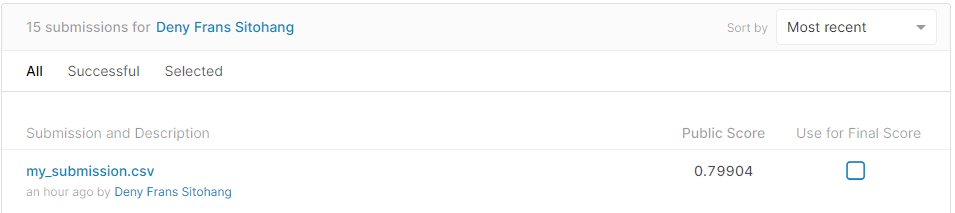

In [57]:
from IPython.display import Image
Image('image2.png')

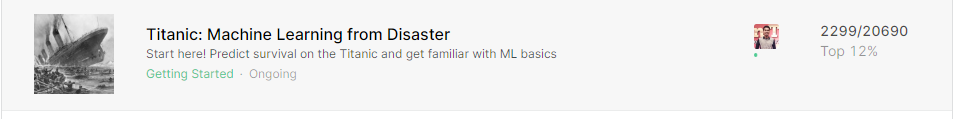

In [58]:
from IPython.display import Image
Image('image.png')